In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# import module to calculate model perfomance metrics
from sklearn import metrics

Data is from collected from JHU
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [163]:
CFM_FP = './data/time_series_covid19_confirmed_global.csv'
cfm_df = pd.read_csv(CFM_FP)

In [164]:
cfm_df_india = cfm_df[cfm_df['Country/Region'] == 'India']
del cfm_df_india['Country/Region']
del cfm_df_india['Province/State']
del cfm_df_india['Lat']
del cfm_df_india['Long']
cfm_df_india.shape

(1, 155)

In [165]:
cfm_df_india

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
131,0,0,0,0,0,0,0,0,1,1,...,343091,354065,366946,380532,395048,410451,425282,440215,456183,473105


<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 1/22/20 to 6/24/20
Data columns (total 1 columns):
count    155 non-null int64
dtypes: int64(1)
memory usage: 7.4+ KB


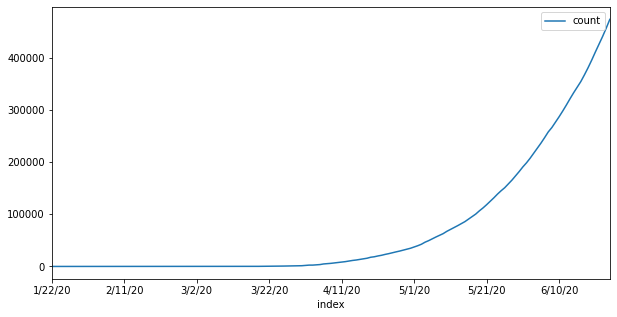

In [166]:
df = cfm_df_india.transpose()
df.columns = ['count']
df.info()
df.reset_index().plot(x='index', y='count', figsize=(10,5))

In [167]:
df = df.rename_axis('date').reset_index()
df.columns = ['date', 'cases']
df.tail()

,date,cases
150,6/20/20,410451
151,6/21/20,425282
152,6/22/20,440215
153,6/23/20,456183
154,6/24/20,473105


In [168]:
df.drop(df[df.cases < 1].index, inplace=True)
df = df.iloc[130:]

In [169]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.toordinal())

In [170]:
# create a Python list of feature names
feature_names = ['date']

# use the list to select a subset of the original DataFrame
X = df[feature_names]

y = df['cases']

# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear Regression Model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print(X_test, ' --> ', y_pred)
print('Score: ', linreg.score(X, y))

# compute the RMSE of our predictions
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.3f' % rmse)

accuracy = linreg.score(X_test,y_test)
print('Accuracy Score of the model = ' ,accuracy*100,'%')

linreg.coef_

Score:  0.9929265958251898
RMSE: 6985.454
Accuracy Score of the model =  99.07639116909233 %


array([13136.11676647])

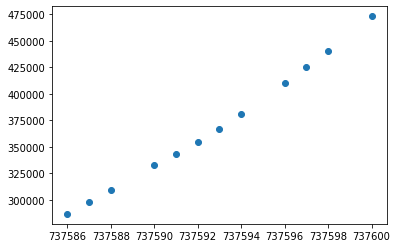

In [171]:
plt.scatter(X_train, y_train)

In [172]:
linreg.fit(X_test, y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
# future_dates = {'date':['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-30']}

future_prediction = pd.DataFrame({'date': np.arange(np.datetime64('2020-06-24'), np.datetime64('2020-07-05'))})
future_prediction['date'] = future_prediction['date'].apply(lambda x: x.toordinal())
prediction = linreg.predict(future_prediction)

In [174]:
x= prediction
y = np.arange(np.datetime64('2020-06-24'), np.datetime64('2020-07-05'))

In [175]:
table = np.array([y, x]).transpose()

In [176]:
from pprint import pprint
pprint(table)

array([[datetime.date(2020, 6, 24), 464601.85628700256],
       [datetime.date(2020, 6, 25), 477737.9730529785],
       [datetime.date(2020, 6, 26), 490874.08981895447],
       [datetime.date(2020, 6, 27), 504010.20658683777],
       [datetime.date(2020, 6, 28), 517146.3233528137],
       [datetime.date(2020, 6, 29), 530282.4401187897],
       [datetime.date(2020, 6, 30), 543418.5568847656],
       [datetime.date(2020, 7, 1), 556554.6736526489],
       [datetime.date(2020, 7, 2), 569690.7904186249],
       [datetime.date(2020, 7, 3), 582826.9071846008],
       [datetime.date(2020, 7, 4), 595963.0239505768]], dtype=object)


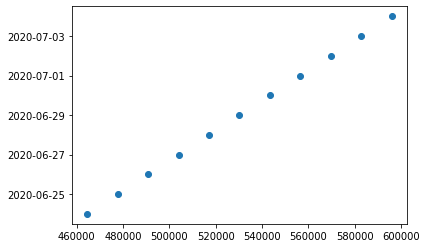

In [177]:
plt.scatter(x, y)